# <center>Structural Analysis and Visualization of Networks</center>

## <center>Home Assignment #4: Community Detection Algorithms

### <center>Student: *{Your Name}*</center>

#### <hr /> General Information

**Due Date:** 03.04.2016 23:59 <br \>
**Late submission policy:** the task will not be graded! <br \>


Please send your reports to <network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1* (For those who have not done that during the seminar)

On this seminar your are asked to implement simple community detection algorightm. It is called [Markov Cluster Algorithm](http://micans.org/mcl/) (MCL).

Implement Markor Clustering Algorithm

**Input:** Transition matrix $T = D^{-1}A$

**Output:** Adjacency matrix $M^*$

1. Set $M = T$
2. **repeat:**
    3. *Expansion Step:* $M = M^p$ (usually $p=2$)
    4. *Inflation Step:* Raise every entry of $M$ to the power $\alpha$ (usualy $\alpha=2$)
    5. *Renormalize:* Normalize each row by its sum
    6. *Prunning:* Replace entries that are close to $0$ by pure $0$
7. **until** $M$ converges
8. $M^* = M$
<br\>
<br\>

As a result you should get a cluster matrix s.t. elements of the cluster correspont to nonzero elements of the columns of the matrix. 
<br\>
* Run this method for network [1](https://www.hse.ru/data/2016/03/15/1127695811/network1.mat), [2](https://www.hse.ru/data/2016/03/15/1127699956/network2.mat) and [3](https://www.hse.ru/data/2016/03/15/1127703057/network3.mat).
* Play with the parameters ($p$, $\alpha$, zero tolerance), analyse the results

<hr />


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
import scipy
import scipy.io
%matplotlib inline

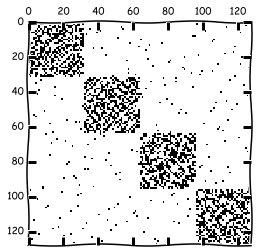

In [4]:
data = scipy.io.loadmat('network1.mat')
A = data['A'].astype('float')
plt.spy(A)
comm = data['Comm']

In [98]:
def MCL(A, tol, p, alpha):
    step = 1
    col_sums = A.sum(axis = 0)
    T = A / col_sums[np.newaxis, :]
    #print(T[1:20][1:20])
    M = T
    print('1')
    while(1):
        #print 'step ', step
        step += 1
        # Expancion step:
        M1 = np.linalg.matrix_power(M, p)
        # Inflation step:
        M1 = np.power(M1, alpha)
        col_sums = M1.sum(axis = 0)
        M1 = M1 / col_sums[np.newaxis, :]
        M1[M1<=tol] = 0
        if np.linalg.norm(M - M1) == 0:
            return M1
        else:
            M = M1.copy()


In [101]:
#p = [1,2,3]
#alpha = [1,2,3]
#tol = [0.1,0.05,0.01]
n=M.shape[0]
max_temp = 0;
for k in xrange(0,1):
    #print('step',k)
    M=MCL(A,0.01,2,2)#tol[k],p[k],alpha[k])
    temp=0
    
    for i in xrange(0,n):
        for j in xrange(0,n):
            if (M[i][j]==1):
                if (comm[i]==comm[j]):
                    temp=temp+1
    temp = temp/n;
    
    print(p[k],alpha[k],tol[k],temp)
    if (temp>max_temp):
        max_temp=temp
print('max accuracy',max_temp)

1
(1, 1, 0.1, 1L)
('max accuracy', 1L)


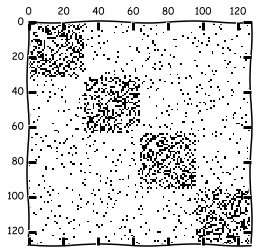

In [102]:
data = scipy.io.loadmat('network2.mat')
A = data['A'].astype('float')
plt.spy(A)
comm = data['Comm']

In [104]:
n=M.shape[0]
max_temp = 0;
for k in xrange(0,1):
    #print('step',k)
    M=MCL(A,0.01,2,2)#tol[k],p[k],alpha[k])
    temp=0
    
    for i in xrange(0,n):
        for j in xrange(0,n):
            if (M[i][j]==1):
                if (comm[i]==comm[j]):
                    temp=temp+1
    temp = temp/n;
    
    print(p[k],alpha[k],tol[k],temp)
    if (temp>max_temp):
        max_temp=temp
print('max accuracy',max_temp)


1
(1, 1, 0.1, 1L)
('max accuracy', 1L)


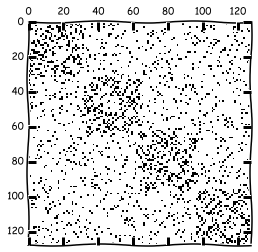

In [105]:
data = scipy.io.loadmat('network3.mat')
A = data['A'].astype('float')
plt.spy(A)
comm = data['Comm']

In [106]:
n=M.shape[0]
max_temp = 0;
for k in xrange(0,1):
    #print('step',k)
    M=MCL(A,0.01,2,2)#tol[k],p[k],alpha[k])
    temp=0
    
    for i in xrange(0,n):
        for j in xrange(0,n):
            if (M[i][j]==1):
                if (comm[i]==comm[j]):
                    temp=temp+1
    temp = temp/n;
    
    print(p[k],alpha[k],tol[k],temp)
    if (temp>max_temp):
        max_temp=temp
print('max accuracy',max_temp)


1
(1, 1, 0.1, 1L)
('max accuracy', 1L)


We get that this model works very good. The equracy of classifiing equals to 1. 

### Task 2

In [52]:
#print(M[1:10,1:10])
print(M)
M.shape

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


(128L, 128L)

Load [Yahoo Music network](https://www.hse.ru/data/2016/03/15/1127704844/music_data.mat). Edges in this network appear if enough number of users have given ratings to both music bands. Note, that edges are weighted with similarity of the ratings.

* Implement *multilevel spectral recursive partitioning* algorithm that was described during the lecture
* Visualize community structure of the network and output some of the dense clusters (with interpretation, if you can)

You can load .mat files with the following commands:

In [15]:
#import scipy.io
import scipy.sparse 
data2 = scipy.io.loadmat('music_data.mat')

In [16]:
a = data2['A']
artists = data2['artists']


In [80]:
n=9276
class_labels = [c for c in np.linspace(0,0,n)]
num_labels = {0: n}
a[a>0] = 1
temp = 0

stop_size = 1000
b={1:10,2:5}
b.update({3:7}) 
b.keys()
for i in b.keys():
    b[i]=b[i]+1
s = [1, -1, -1]
num_labels = {1:3}
class_labels = [1, 1, 1]
for i in xrange(0,3):
    if (s[i]==-1):
        num_labels[class_labels[i]] = num_labels[class_labels[i]] - 1    
print(num_labels)

num_labels.update({step:5})
print(num_labels)
print(b)
flag=False

{1: 1}
{1: 1, 2: 5}
{1: 11, 2: 6, 3: 8}


In [82]:
n=9276
class_labels = [c for c in np.linspace(1,1,n)]
num_labels = {1: n}
a[a>0] = 1
temp = 0

stop_size = 1000

flag=False
step=1

for k in xrange(0,5):
    step = step+1
    print('step ',step)
    temp = 0
    d = np.diagflat(a.sum(axis = 1))  
    d = scipy.sparse.csr_matrix(d)                     
    l = d - a                                       
    la, v = scipy.sparse.linalg.eigsh(l, k=2,  M = d, which = 'SM')  
    s = np.linspace(1,1,n)
    s[v[:,1]<0] = -1
    if (sum(s)==n or sum(s)==-n):#новый класс не выделился
        break
    print('1',num_labels)
    for i in xrange(0,n):
        if (s[i]==-1):
            num_labels[class_labels[i]] = num_labels[class_labels[i]] - 1 #уменьшили число элементов в старом классе
            #print(num_labels[class_labels[i]])
            class_labels[i]=int(step) #приписали новый класс
            temp = temp+1
    print('2',num_labels)
    num_labels.update({step:temp}) #добавили новый класс с кол-вом элементов в нем
    print('3',num_labels)
    flag=False
    print('how')
    print(num_labels)
    print(num_labels.keys())
    for i in num_labels.keys():
        if (num_labels[i]>stop_size):#если нашли хотя бы 1 большего размера
            flag = True
    if (flag == False):
        break
    for i in xrange(0,n):#переписываем матрицу а, удаляем ребра
        for j in xrange(0,n):   
            if (s[i]==-1):
                if (a[i,j]==1 and s[j]==1):
                    a[i,j]=0
                    a[j,i]=0
    print('ended', step)
        
#print(la)
#print(v)

('step ', 2)
('1', {1: 9276})
('2', {1: 1803})
('3', {1: 1803, 2: 7473})
how
{1: 1803, 2: 7473}
[1, 2]


KeyboardInterrupt: 

In [29]:
#s = np.linspace(1,1,n)
#print(v[:,1])
#s[v[:,1]<0] = -1

[  3.01352303e-04  -4.49602695e-04   9.77264492e-05 ...,  -5.22943357e-04
  -4.78629496e-04  -2.01260944e-04]


Unfortunately, the program time was too much to solved this task.
        